In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
import time
from sklearn.manifold import TSNE


In [2]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = mnist.data.iloc[indices].values / 255.0
y = mnist.target[indices].values
print(X.shape, y.shape)
y=[int(i) for i in y]

(10000, 784) (10000,)


In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

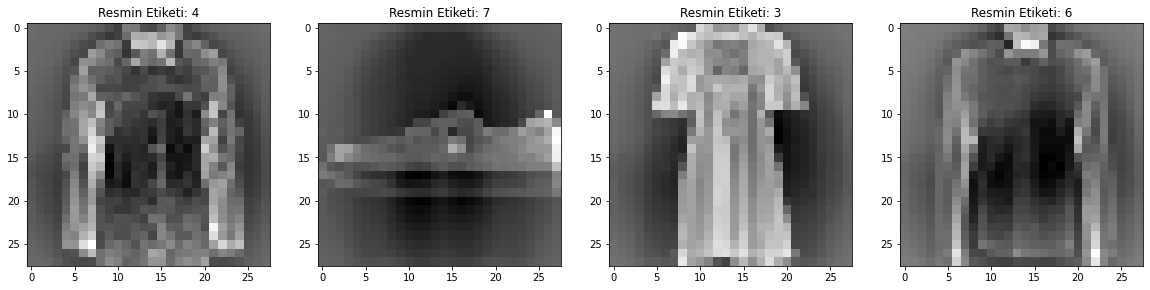

In [5]:
plt.figure(figsize=(20,5))

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(X_std[i].reshape(28,28), cmap="gray")
    plt.title("Resmin Etiketi: {}".format(y[i]))
plt.show()

UMAP tamamlandı! Geçen süre: 6.4470908641815186 saniye


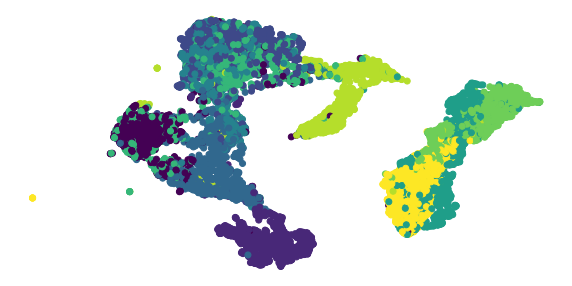

In [11]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP tamamlandı! Geçen süre: {} saniye'.format(time.time()-time_start))

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1],c=y)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP tamamlandı! Geçen süre: 36.45727872848511 saniye


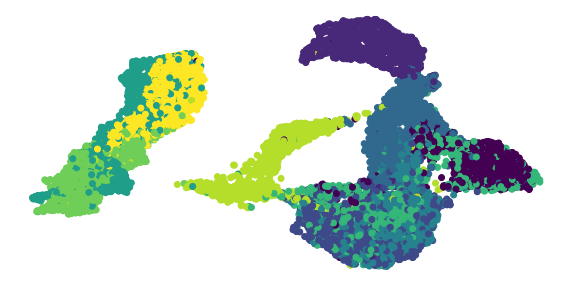

In [12]:
umap_results = umap.UMAP(n_neighbors=10,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X)

print('UMAP tamamlandı! Geçen süre: {} saniye'.format(time.time()-time_start))

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1],c=y)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP tamamlandı! Geçen süre: 106.5292444229126 saniye


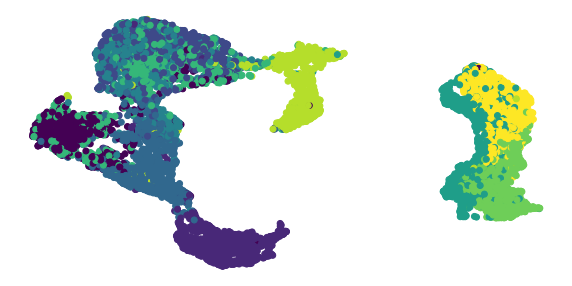

In [13]:
umap_results = umap.UMAP(n_neighbors=8,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP tamamlandı! Geçen süre: {} saniye'.format(time.time()-time_start))

plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1],c=y)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

verilerin kümelenmesini göz önüne alırsak en iyi parametrik değerlerin son modelde kullanılan n_neighbors=8 ,min_dist=0.3 değerler olduğunu söyleyebiliriz.

PCA ve t-SNE ile karşılaştırılması:

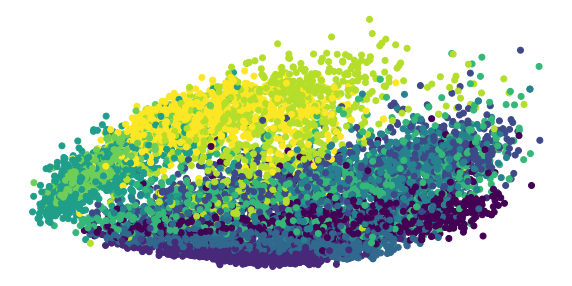

In [18]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_std)
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1],c=y)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.010s...
[t-SNE] Computed neighbors for 10000 samples in 2.929s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.836341
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.790092
[t-SNE] KL divergence after 300 iterations: 2.519311
t-SNE tamamlandı! Geçen z

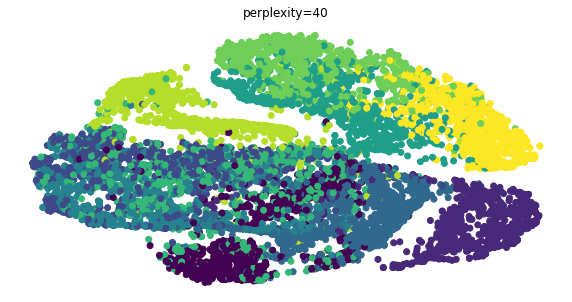

In [21]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE tamamlandı! Geçen zaman: {} saniye'.format(time.time()-time_start))

plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1],c=y)
plt.xticks([])
plt.yticks([])
plt.title("perplexity=40")
plt.axis('off')
plt.show()